In [73]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# for pre-processing
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [74]:
df=pd.read_csv('/content/Metabolic Syndrome.csv')

In [75]:
df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


In [76]:
df.shape

(2401, 15)

In [77]:
df.describe()

,seqn,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
count,2401.000000,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,67030.674302,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364,0.342357
std,2823.565114,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477,0.474597
min,62161.000000,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000,0.000000
25%,64591.000000,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000,0.000000
50%,67059.000000,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000,0.000000
75%,69495.000000,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000,1.000000
max,71915.000000,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000,1.000000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


In [79]:
df.isnull().sum()

seqn                   0
Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

In [80]:
df['Marital'].fillna(0, inplace=True)

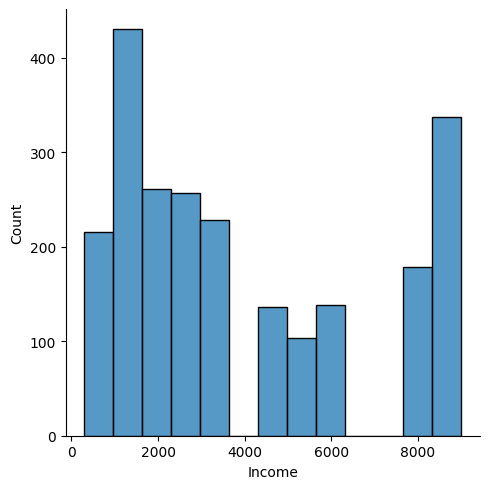

In [81]:
from seaborn.distributions import KDE
sns.displot(df['Income'],kind='hist')
plt.show()

In [82]:
# since the distribution of Income is not normal we will used median for filling null values
a = df['Income'].median()
df['Income']  =  df['Income'].fillna(value=a)

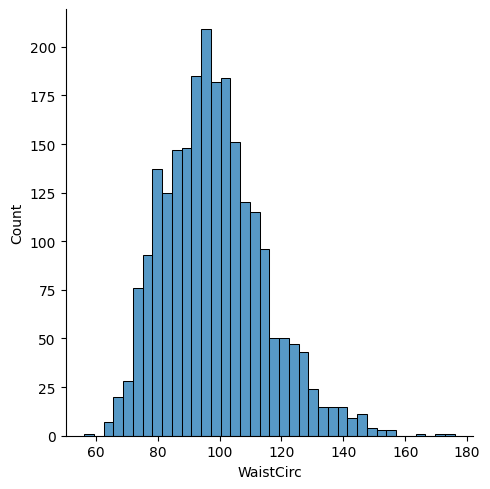

In [83]:
sns.displot(df['WaistCirc'],kind='hist')
plt.show()

In [84]:
# since there are some outliear in waistCirc we will used median to fill null values
a=df['WaistCirc'].median()
df['WaistCirc']  =  df['WaistCirc'].fillna(value=a)

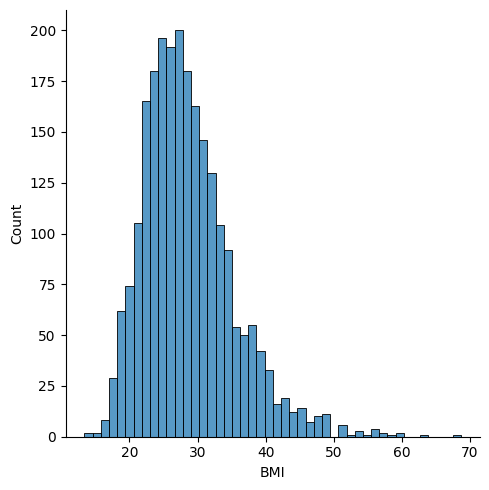

In [85]:
sns.displot(df['BMI'],kind='hist')
plt.show()

In [86]:
# since there are some outliear in BMI we will used median to fill null values
a=df['BMI'].median()
df['BMI']  =  df['BMI'].fillna(value=a)

In [87]:
df.isnull().sum()

seqn                 0
Age                  0
Sex                  0
Marital              0
Income               0
Race                 0
WaistCirc            0
BMI                  0
Albuminuria          0
UrAlbCr              0
UricAcid             0
BloodGlucose         0
HDL                  0
Triglycerides        0
MetabolicSyndrome    0
dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2401 non-null   object 
 4   Income             2401 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2401 non-null   float64
 7   BMI                2401 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


In [89]:
df[ 'Sex'].replace(['Male', 'Female'], [0, 1], inplace=True)
df[ 'Marital'].replace(['Single', 'Married', 'Widowed', 'Divorced', 'Separated'], [0, 1, 2, 3, 4], inplace=True)
df[ 'Race'].replace(['White', 'Asian', 'Black', 'MexAmerican', 'Hispanic', 'Other'], [0, 1, 2, 3, 4, 5], inplace=True)



In [90]:
df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,0,0,8200.0,0,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,1,1,4500.0,0,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,0,0,800.0,1,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,1,0,2000.0,2,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,0,1,2500.0,1,81.1,20.1,0,8.13,5.0,95,43,126,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   int64  
 3   Marital            2401 non-null   int64  
 4   Income             2401 non-null   float64
 5   Race               2401 non-null   int64  
 6   WaistCirc          2401 non-null   float64
 7   BMI                2401 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(10)
memory usage: 281.5 KB


In [92]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [94]:
print(x.shape)

(2401, 14)


In [95]:
print(y_train.shape)

(1680,)


In [96]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100,max_features = 3))
sel.fit(x_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(max_features=3))

In [97]:
sel.get_support()

array([False, False, False, False, False, False,  True,  True, False,
       False, False,  True,  True,  True])

In [98]:
selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

5

In [99]:
print(selected_feat)

Index(['WaistCirc', 'BMI', 'BloodGlucose', 'HDL', 'Triglycerides'], dtype='object')


In [100]:
# Creating a Random Forest Classifier model
random_forest_model = RandomForestClassifier(random_state=10)

# Fiting the model to the training data
random_forest_model.fit(x_train, y_train)

# Making predictions on the test data
pred= random_forest_model.predict(x_test)

In [101]:
# Calculating accuracy
accuracy = accuracy_score(y_test, pred)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.8723994452149791


In [102]:
# Making predictions on the training data
pred1= random_forest_model.predict(x_train)

In [103]:
# Calculating accuracy
accuracy = accuracy_score(y_train, pred1)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 1.0
